In [15]:
import requests
from bs4 import BeautifulSoup
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
partial_url = 'https://cbi.iq/currency_auction/view/'
ua1 = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) " \
      "Chrome/66.0.3359.139 Safari/537.36"
headers = {"User-Agent": ua1}

In [134]:
whole_url = partial_url + '124'

page = requests.get(whole_url, headers=headers, timeout=500)
soup = BeautifulSoup(page.content, "html.parser")

# soup.find_all('span', attrs={"style":"font-family:Arial,Helvetica,sans-serif"})[0:]
info = soup.find_all('span', attrs={"style":"font-family:Arial,Helvetica,sans-serif"})
info

[<span style="font-family:Arial,Helvetica,sans-serif"><span style="font-size:16px"><strong>إعلان رقم (3529)</strong></span></span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><span style="font-size:14px"><strong>تـاريخ البيع</strong> - الثلاثاء 19-9-2017 والمنفذ يوم الاثنين 18-9-2017</span></span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><strong>التفاصيل</strong> </span>,
 <span style="font-family:Arial,Helvetica,sans-serif"><strong>المبلغ</strong></span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي البيع لأغراض تعزيز الارصدة في الخارج (حوالات،إعتمادات)</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">118,812,407</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي البيع النقدي</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">2,160,000</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">اجمالي المبيعات الكلية</span>,
 <span style="font-family:Arial,Helvetica,sans-serif">162,772,407</span>,
 <s

In [135]:
data = [i.text for i in info]
print(data[1])
print(data[5])
print(data[7])
print(data[9])
print(data[-3])

تـاريخ البيع - الثلاثاء 19-9-2017 والمنفذ يوم الاثنين 18-9-2017
118,812,407
2,160,000
162,772,407
سعر بيع المبالغ المحولة لحسابات المصارف في الخارج (1190) دينار لكل دولار.


### URLs 124 - 394

#### Function to scrape and save (run in separate .py file)

In [128]:
# establish df outside the for loop

def scraper_124_394():
    df = pd.DataFrame(columns=['date', 'total_for_foreign',
                               'total_cash', 'grand_total', 'exchange_rate'])
    for page in range(124, 395):

        # piece together each unique URL
        whole_url = partial_url + str(page)
        print(whole_url)
        try:
            page = requests.get(whole_url, headers=headers, timeout=500)
            soup = BeautifulSoup(page.content, "html.parser")

            info = soup.find_all(
                'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})
            # put data into a list
            data = [i.text for i in info]
            df = df.append({'date': data[1],
                            'total_for_foreign': data[5],
                            'total_cash': data[7],
                            'grand_total': data[9],
                            'exchange_rate': data[-3],
                            'url':whole_url}, ignore_index=True)
        except Exception:
            print('No URL at that number')

        time.sleep(1.2)
    df.to_csv('124_394.csv',index=False)
    return df

In [129]:
!ls

124_394.csv       README.md         scraper124394.py
CBI_Project.ipynb initial_df.csv


In [60]:
raw_data = pd.read_csv('initial_df.csv',index_col=False)

In [69]:
raw_data.iloc[4:6,4]

4    سعر بيع المبالغ المحولة لحسابات المصارف في الخ...
5    سعر بيع المبالغ المحولة لحسابات المصارف في الخ...
Name: exchange_rate, dtype: object

In [130]:
raw_data.iloc[250:270,:]

,date,total_for_foreign,total_cash,grand_total,exchange_rate
250,تـاريخ البيع - ليوم الخميس 2018/9/6 والمنفذ يو...,"168,404,815","31,100,000",اجمالي المبيعات الكلية,علماً أن :
251,تـاريخ البيع - ليوم الاحد 2018/9/9 والمنفذ يوم...,"165,241,119","33,050,000\r\n","198,291,119",علماً أن :
252,تـاريخ البيع - ليوم الاثنين 2018/9/10 والمنفذ ...,"169,998,910","37,350,000\r\n","207,348,910",علماً أن :
253,تـاريخ البيع - ليوم الثلاثاء 2018/9/11 والمنفذ...,"161,015,027","34,350,000\r\n","195,365,027",علماً أن :
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :
259,3789,الـمبلغ,"190,058,455","35,900,000 \r\n",علماً أن :


#### Cleaning 124-394

In [3]:
raw_data1 = pd.read_csv('124_394.csv')

In [4]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393
259,3789,الـمبلغ,"190,058,455","35,900,000 \r\n",علماً أن :,https://cbi.iq/currency_auction/view/394


In [5]:
# chop off last row
raw_data1 = raw_data1.iloc[:259,]

In [6]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [7]:
# strip new lines
raw_data1['total_for_foreign'] = raw_data1['total_for_foreign'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000\r\n","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000\r\n","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000\r\n","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000\r\n","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000\r\n","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [8]:
raw_data1['total_cash'] = raw_data1['total_cash'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [9]:
raw_data1['grand_total'] = raw_data1['grand_total'].str.strip()
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,"174,421,480","35,100,000","209,521,480",علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,"156,902,584","30,800,000","187,702,584",علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,"182,569,754","32,350,000","214,919,754",علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,"147,381,019","38,000,000","185,381,019",علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,"104,937,400","32,250,000","137,187,400",علماً أن :,https://cbi.iq/currency_auction/view/393


In [10]:
# now to remove the commas and convert to int
raw_data1['total_for_foreign'] = raw_data1.total_for_foreign.str.replace(',','')
raw_data1['total_for_foreign'] = pd.to_numeric(raw_data1.total_for_foreign,errors='coerce')

In [11]:
raw_data1['total_cash'] = pd.to_numeric(raw_data1.total_cash.str.replace(',',''), errors='coerce')

In [12]:
raw_data1['grand_total'] = pd.to_numeric(raw_data1.grand_total.str.replace(',',''), errors='coerce')

raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
date                 259 non-null object
total_for_foreign    254 non-null float64
total_cash           254 non-null float64
grand_total          232 non-null float64
exchange_rate        259 non-null object
url                  259 non-null object
dtypes: float64(3), object(3)
memory usage: 12.2+ KB


In [13]:
raw_data1.tail()

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
254,تـاريخ البيع - ليوم الاربعاء 2018/9/12 والمنفذ...,174421480.0,35100000.0,209521480.0,علماً أن :,https://cbi.iq/currency_auction/view/389
255,تـاريخ البيع - ليوم الخميس 2018/9/13 والمنفذ ي...,156902584.0,30800000.0,187702584.0,علماً أن :,https://cbi.iq/currency_auction/view/390
256,تـاريخ البيع - ليوم الأحد 2018/9/16 والمنفذ يو...,182569754.0,32350000.0,214919754.0,علماً أن :,https://cbi.iq/currency_auction/view/391
257,تـاريخ البيع - ليوم الأثنين 2018/9/17 والمنفذ ...,147381019.0,38000000.0,185381019.0,علماً أن :,https://cbi.iq/currency_auction/view/392
258,تـاريخ البيع - ليوم الثلاثاء 2018/9/18 والمنفذ...,104937400.0,32250000.0,137187400.0,علماً أن :,https://cbi.iq/currency_auction/view/393


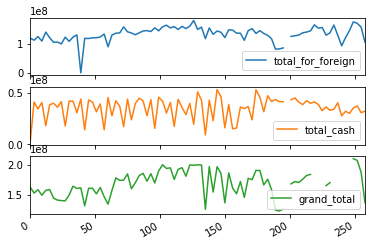

In [20]:
raw_data1[['total_for_foreign','total_cash','grand_total']][::3].plot(subplots=True)
plt.show()

In [22]:
# output CSV with cleaned columns
raw_data1.to_csv('range1_cleaned.csv',index=False)

### Determining next range

In [25]:
# Starts at 394, but doesn't go all the way to 643.
# In fact, appears to change multiple times between 394 and 643

for page in range(394, 395):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)

page 394
https://cbi.iq/currency_auction/view/394


In [27]:
print(data)

['إعلان رقم (', '3789', ')', 'تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ يوم الثلاثاء 2018/9/18\xa0 ', 'التفاصيل ', '    الـمبلغ', 'اجمالي البيع لأغراض تعزيز الارصدة في الخارج (حوالات،إعتمادات)', '190,058,455', 'اجمالي البيع النقدي', '35,900,000 \r\n', 'اجمالي المبيعات الكلية', ' 225,958,455', 'علماً أن :', 'سعر بيع المبالغ المحولة لحسابات المصارف في الخارج (1190)\xa0دينار لكل دولار.', 'سعر البيع النقدي (1190)\xa0دينارلكل دولار.']


In [41]:
# get date    
print(data[3])
# get total_for_foreign
print(data[7])
# # get total_cash
print(data[9])
# # get grand_total
print(data[11])
# # get exchange_rate
print(data[14])

تـاريخ البيع - ليوم الأربعاء 2018/9/19 والمنفذ يوم الثلاثاء 2018/9/18  
190,058,455
35,900,000 

 225,958,455
سعر البيع النقدي (1190) دينارلكل دولار.


In [45]:
n = 494
for page in range(n, n+10):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)


    # get date    
    print(data[3])
    # get total_for_foreign
    print(data[7])
    # # get total_cash
    print(data[9])
    # # get grand_total
    print(data[11])
    # # get exchange_rate
    print(data[14])

page 494
https://cbi.iq/currency_auction/view/494
تـاريخ البيع - ليوم الأربعاء 2019/2/6 والمنفذ يوم الثلاثاء 2019/2/5  
120,429,996
25,440,000
145,869,996
سعر البيع النقدي (1190) دينارلكل دولار.
page 495
https://cbi.iq/currency_auction/view/495
تـاريخ البيع - ليوم الخميس 2019/2/7 والمنفذ يوم الأربعاء 2019/2/6  
115,199,380
18,110,000
133,309,380
سعر البيع النقدي (1190) دينارلكل دولار.
page 496
https://cbi.iq/currency_auction/view/496
تـاريخ البيع - ليوم الاحد 2019/2/10 والمنفذ يوم الخميس 2019/2/7  
117,261,040
19,690,000
136,951,040
سعر البيع النقدي (1190) دينارلكل دولار.
page 497
https://cbi.iq/currency_auction/view/497
تـاريخ البيع - ليوم الأثنين 2019/2/11 والمنفذ يوم الأحد 2019/2/10  
131,618,629
26,750,000
158,368,629
سعر البيع النقدي (1190) دينارلكل دولار.
page 498
https://cbi.iq/currency_auction/view/498
تـاريخ البيع - ليوم الثلاثاء 2019/2/12 والمنفذ يوم الأثنين 2019/2/11  
122,956,661
24,000,000
146,956,661
سعر البيع النقدي (1190) دينارلكل دولار.
page 499
https://cbi.iq/currency

In [48]:
n = 620
for page in range(n, n+20,2):
    print('page {}'.format(page))
    # piece together each unique URL
    whole_url = partial_url + str(page)
    print(whole_url)

    page = requests.get(whole_url, headers=headers, timeout=500)
    soup = BeautifulSoup(page.content, "html.parser")

    info = soup.find_all(
        'span', attrs={"style": "font-family:Arial,Helvetica,sans-serif"})

    data = [i.text for i in info]

    time.sleep(0.5)


    # get date    
    print(data[3])
    # get total_for_foreign
    print(data[7])
    # # get total_cash
    print(data[9])
    # # get grand_total
    print(data[11])
    # # get exchange_rate
    print(data[14])

page 620
https://cbi.iq/currency_auction/view/620
تـاريخ البيع - ليوم الأثنين 2019/8/5 والمنفذ يوم الأحد 2019/8/4  
199,459,242
28,360,000
227,819,242
سعر البيع النقدي (1190) دينارلكل دولار.
page 622
https://cbi.iq/currency_auction/view/622
تـاريخ البيع - ليوم الأربعاء 2019/8/7 والمنفذ يوم الثلاثاء 2019/8/6  
204,386,646
22,760,000
227,146,646
سعر البيع النقدي (1190) دينارلكل دولار.
page 624
https://cbi.iq/currency_auction/view/624
تـاريخ البيع - ليوم الأحد 2019/8/18 والمنفذ يوم الخميس 2019/8/8  
135,880,500
19,290,000
155,170,500
سعر البيع النقدي (1190) دينارلكل دولار.
page 626
https://cbi.iq/currency_auction/view/626
تـاريخ البيع - ليوم الثلاثاء 2019/8/20 والمنفذ يوم الأثنين 2019/8/19  
143,473,309
20,180,000
163,653,309
سعر البيع النقدي (1190) دينارلكل دولار.
page 628
https://cbi.iq/currency_auction/view/628
تـاريخ البيع - ليوم الخميس 2019/8/22 والمنفذ يوم الأربعاء 2019/8/21  
187,149,922
24,470,000
211,619,922
سعر البيع النقدي (1190) دينارلكل دولار.
page 630
https://cbi.iq/currency

Determination was that the range from 394 to 643 had a few gaps, but was otherwise standard